In [139]:
import numpy as np
import matplotlib.pyplot as plt

In [140]:
def dual_norm(c, x):
    h_inv = np.linalg.inv(hessian(x))
    return np.sqrt(c.T @ h_inv @ c)

def gradient(x):
    t_1 = np.array([1 / (1 - x[i]) for i in range(20)])
    t_2 = np.array([-1 / (1 + x[i]) for i in range(20)])
    return t_1 + t_2

def hessian(x):
    t_1 = np.array([1 / (1 - x[i]) ** 2 for i in range(20)])
    t_2 = np.array([1 / (1 + x[i]) ** 2 for i in range(20)])
    return np.diag(t_1 + t_2)

In [141]:
def cPath(eps, x0):
    gamma = .1
    x = x0
    t, c = np.zeros((20,)), np.ones((20,))
    res = []
    for _ in range(10000):
        t = t + gamma / dual_norm(c, x0)
        x = x - np.linalg.inv(hessian(x)) @ (t * c + gradient(x)) / (1 + eps)
#         lamb = dual_norm(t * c + gradient(x), x)
#         eps = lamb ** 2 / (1 + lamb)
        res.append(x @ c)
    return res

In [142]:
res = cPath(0.00001, np.zeros((20,)))

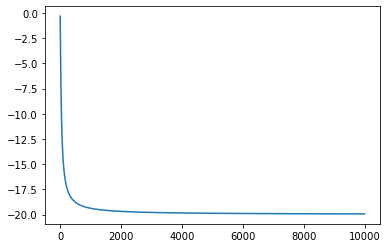

In [143]:
plt.plot(np.arange(10000), res)